In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)

#Wygenerowanie danych do modelu regresyjnego make_regression

In [ ]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 30.0, random_state = 42)

print(f'Data shape: {data.shape}')
print(f'Target shape: {target.shape}')

Data shape: (100, 1)
Target shape: (100,)


In [ ]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [ ]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

##Wizualizacja wygenerowanych danych

[]

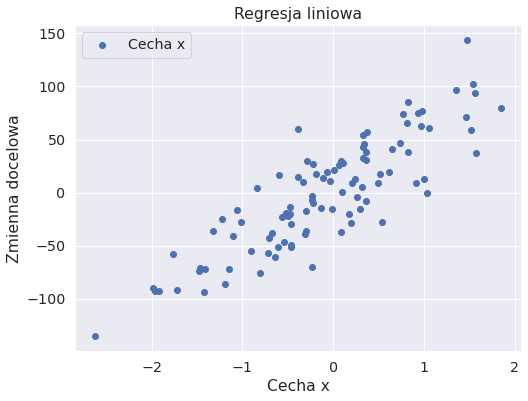

In [ ]:
plt.figure(figsize = (8,6))
plt.title('Regresja liniowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(data, target, label='Cecha x')
plt.legend()
plt.plot()

#Regresja liniowa ze scikit-learn

##LinearRegression, fit

In [ ]:
#Y = w0 + w1*X1
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#Dopasowanie modelu liniowego do danych
regressor.fit(data, target)

LinearRegression()

##score() - daje wynik R2 score, im bliżej 1 tym lepiej dopasowany model

In [ ]:
#Score() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
regressor.score(data, target)

0.7426670084336404

##predict() - predykcja na podstawie modelu

In [ ]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

#Współczynnik R2

In [ ]:
regressor.score(data, target)

0.7426670084336404

In [ ]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
regressor.coef_

array([49.83])

In [ ]:
regressor.intercept_

3.4953459615809175

#Końcowa postać modelu

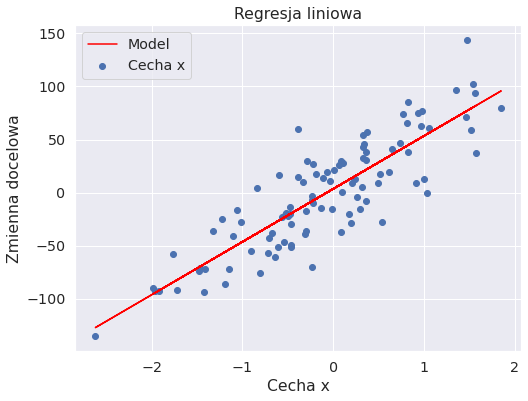

In [ ]:
# Y = intercept_ * coef_[0] * X1
plt.figure(figsize = (8,6))
plt.title('Regresja liniowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(data, target, label = 'Cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color = 'red', label = 'Model')
plt.legend()
plt.show()

#Regresja z podziałem na zbiór treningowy i testowy

In [20]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)
print(f'Data shape: {data.shape}')
print(f'Target shape: {target.shape}')

Data shape: (1000, 1)
Target shape: (1000,)


##Podział danych na zbiór treningowy i testowy

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


[]

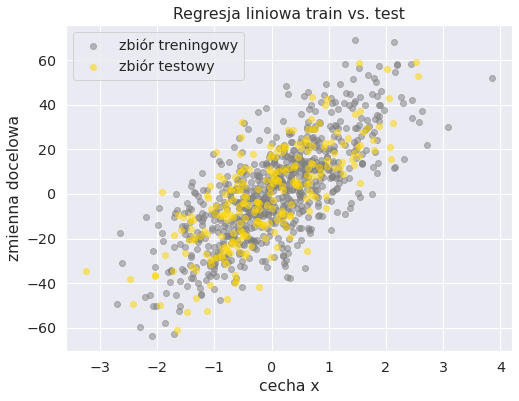

In [22]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

##Trenowanie modelu na danych treningowych

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
regressor.score(X_train, y_train)

0.5358651607106343

In [26]:
regressor.score(X_test, y_test)

0.5659717578254748

##Wizualizacja - zbiór treningowy

[]

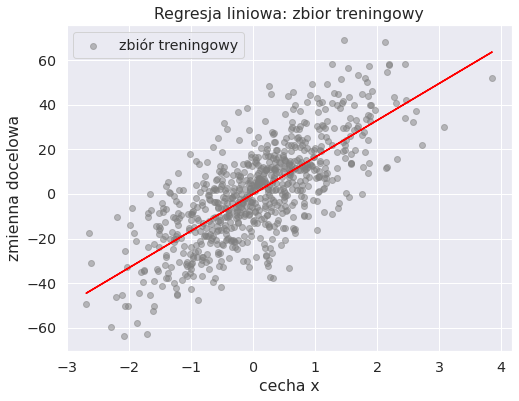

In [27]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
# plt.plot(X_train, regressor.intercept_ + regressor.coef_[0]*X_train, color='red')
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()

##Wizualizacja - zbiór testowy

[]

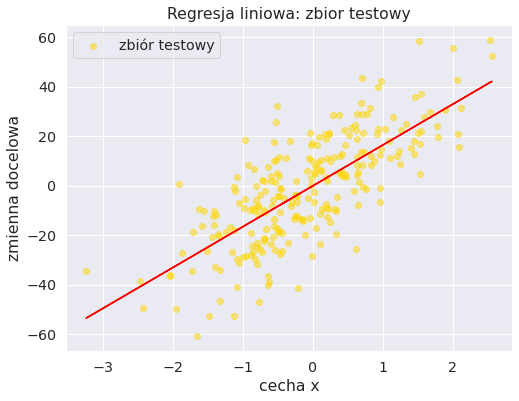

In [30]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.plot()

##Predykcja na podstawie modelu

In [32]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-1.015112,-7.862339
1,-0.746220,15.814004
2,43.431648,11.661877
3,-1.931385,9.803136
4,-11.866084,-22.764698


In [34]:
y_test.mean()

-1.1993683669081314

In [35]:
y_pred.mean()

-1.5635635769469214

In [36]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-1.015112,-7.862339,6.847227
1,-0.746220,15.814004,-16.560224
2,43.431648,11.661877,31.769771
3,-1.931385,9.803136,-11.734521
4,-11.866084,-22.764698,10.898614


##Histogram błędu

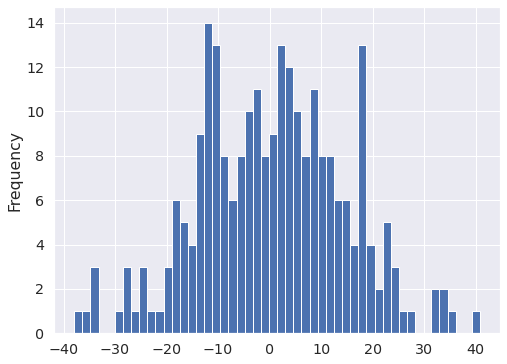

In [37]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))